<a href="https://www.kaggle.com/code/palpriyanshu/housing-prices?scriptVersionId=293604405" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [2]:
import numpy as np
import pandas as pd

import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [3]:
test_df = pd.read_csv("/kaggle/input/home-data-for-ml-course/test.csv")
train_df  = pd.read_csv("/kaggle/input/home-data-for-ml-course/train.csv")


In [4]:
y = np.log1p(train_df["SalePrice"])
train_df.drop("SalePrice", axis=1, inplace=True)


In [5]:
all_data = pd.concat([train_df, test_df], axis=0)


In [6]:
for col in all_data.columns:
    if all_data[col].dtype == "object":
        all_data[col].fillna("None", inplace=True)
    else:
        all_data[col].fillna(all_data[col].median(), inplace=True)


/tmp/ipykernel_17/1028155351.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_data[col].fillna(all_data[col].median(), inplace=True)
/tmp/ipykernel_17/1028155351.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [7]:
all_data = pd.get_dummies(all_data)


In [8]:
X = all_data.iloc[:len(y), :]
X_test = all_data.iloc[len(y):, :]


In [9]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
model = lgb.LGBMRegressor(
    objective="regression",
    n_estimators=3000,
    learning_rate=0.01,
    num_leaves=31,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

from lightgbm import early_stopping, log_evaluation

model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric="rmse",
    callbacks=[
        early_stopping(stopping_rounds=200),
        log_evaluation(period=200)
    ]
)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3473
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 194
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 12.030658
Training until validation scores don't improve for 200 rounds
[200]	valid_0's rmse: 0.168595	valid_0's l2: 0.0284243
[400]	valid_0's rmse: 0.141076	valid_0's l2: 0.0199024
[600]	valid_0's rmse: 0.138628	valid_0's l2: 0.0192176
[800]	valid_0's rmse: 0.138132	valid_0's l2: 0.0190806
[1000]	valid_0's rmse: 0.137965	valid_0's l2: 0.0190344
[1200]	valid_0's rmse: 0.13791	valid_0's l2: 0.0190193
[1400]	valid_0's rmse: 0.137777	valid_0'

LGBMRegressor(colsample_bytree=0.8, learning_rate=0.01, n_estimators=3000,
              objective='regression', random_state=42, subsample=0.8)

In [11]:
val_preds = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, val_preds))
print("Validation RMSE:", rmse)


Validation RMSE: 0.13755812758663574


In [12]:
model.fit(X, y)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3744
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 203
[LightGBM] [Info] Start training from score 12.024057


LGBMRegressor(colsample_bytree=0.8, learning_rate=0.01, n_estimators=3000,
              objective='regression', random_state=42, subsample=0.8)

In [13]:
test_preds = model.predict(X_test)
test_preds = np.expm1(test_preds)


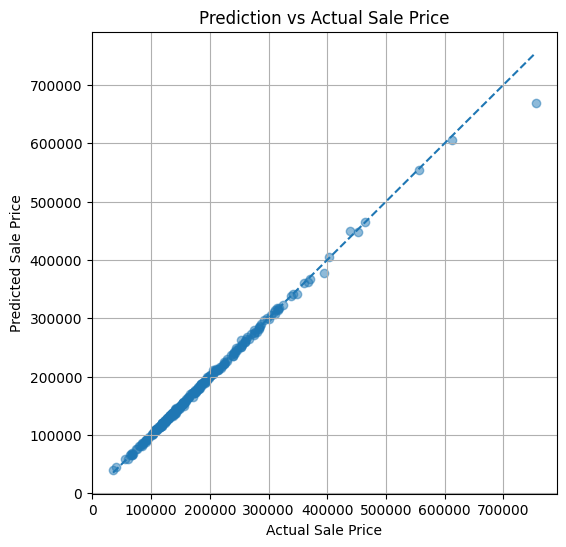

In [14]:
import matplotlib.pyplot as plt

# Predict on validation set (log scale)
val_preds_log = model.predict(X_val)

# Convert back to original price scale
val_preds = np.expm1(val_preds_log)
y_val_actual = np.expm1(y_val)

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(y_val_actual, val_preds, alpha=0.5)
plt.plot(
    [y_val_actual.min(), y_val_actual.max()],
    [y_val_actual.min(), y_val_actual.max()],
    linestyle='--'
)

plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Prediction vs Actual Sale Price")
plt.grid(True)
plt.show()


In [15]:
submission = pd.DataFrame({
    "Id": test_df["Id"],
    "SalePrice": test_preds
})

submission.to_csv("submission.csv", index=False)
